In [7]:
!pip install opencv-python
!pip install mediapipe
!pip install mlcroissant


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------- ----------------------- 4.7/11.6 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.6 MB 30.1 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 26.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/564.9 kB ? eta -:--:--
   --------------------------------------- 564.9/564.9 kB 18.9 MB/s eta 0:00:00
Using cac

In [2]:
import cv2
import mediapipe as mp

In [7]:
# Charge les modèles Face Detection de MediaPipe
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [3]:
# Charge un emoji (PNG avec canal alpha pour la transparence)
emoji = cv2.imread("./images/emoji.png", cv2.IMREAD_UNCHANGED) 

In [10]:
# Initialise le détecteur de visages
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    image = cv2.imread("./images/photo.png")  # Charge ton image
    if image is None:
        print("Erreur: Image non trouvée.")
    else:
        # Convertit en RGB (MediaPipe a besoin de RGB)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_image)

        if results.detections:
            for detection in results.detections:
                # Récupère la boîte englobante du visage
                bboxC = detection.location_data.relative_bounding_box
                h, w, _ = image.shape
                x, y = int(bboxC.xmin * w), int(bboxC.ymin * h)
                width, height = int(bboxC.width * w), int(bboxC.height * h)

                # Redimensionne l'emoji à la taille du visage
                emoji_resized = cv2.resize(emoji, (width, height))

                # Superpose l'emoji (gestion de la transparence)
                for c in range(0, 3):
                    image[y:y+height, x:x+width, c] = \
                        emoji_resized[:, :, c] * (emoji_resized[:, :, 3] / 255.0) + \
                        image[y:y+height, x:x+width, c] * (1.0 - emoji_resized[:, :, 3] / 255.0)
                            # Affiche le résultat
        cv2.imshow("Face avec Emoji", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [4]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

In [6]:
cap = cv2.VideoCapture(0)
with mp.solutions.face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                bbox = detection.location_data.relative_bounding_box
                h, w, _ = frame.shape

                x = max(0, int(bbox.xmin * w))
                y = max(0, int(bbox.ymin * h))
                width = int(bbox.width * w)
                height = int(bbox.height * h)
                
                # Ajuster pour ne pas dépasser l'image
                width = min(width, w - x)
                height = min(height, h - y)

                if width > 0 and height > 0:  # Éviter les dimensions nulles !
                    emoji_resized = cv2.resize(emoji, (width, height))
                    
                    alpha = emoji_resized[:, :, 3] / 255.0
                    for c in range(3):
                        try:
                            frame[y:y+height, x:x+width, c] = (
                                alpha * emoji_resized[:, :, c] + 
                                (1 - alpha) * frame[y:y+height, x:x+width, c]
                            )
                        except ValueError:
                            # En cas d'échec, redimensionner dynamiquement
                            emoji_resized = cv2.resize(emoji_resized, (frame[y:y+height, x:x+width, c].shape[1], frame[y:y+height, x:x+width, c].shape[0]))
                            alpha = emoji_resized[:, :, 3] / 255.0
                            frame[y:y+height, x:x+width, c] = alpha * emoji_resized[:, :, c] + (1 - alpha) * frame[y:y+height, x:x+width, c]

        cv2.imshow('Emoji en Direct', frame)
        if cv2.waitKey(1) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


download FER dataset from https://www.kaggle.com/datasets/msambare/fer2013

In [12]:
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import collections
import os

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten,Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [16]:
train_dir = "./data/fer/train"
test_dir = "./data/fer/test"

Loading contents of my input

In [17]:
fer_ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(48, 48),    # Resize images
    color_mode="grayscale", # Convert to grayscale (or use "rgb" if needed)
    batch_size=32,          # Set batch size
    label_mode="categorical",       # Use "categorical" for one-hot encoding
    shuffle=True,            # Shuffle the dataset
    validation_split=0.2,  # 20% of training data for validation
    subset="training",  # This dataset will be used for training
    seed=123
)

fer_ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(48, 48),    # Resize images
    color_mode="grayscale", # Convert to grayscale (or use "rgb" if needed)
    batch_size=32,          # Set batch size
    label_mode="categorical",       # Use "categorical" for one-hot encoding
    shuffle=True,            # Shuffle the dataset
    validation_split=0.2,  # Use the same validation split
    subset="validation",  # This dataset will be used for validation
    seed=123
)


fer_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical",
    shuffle=False
)

for images, labels in fer_ds_train.take(1):
    print("Label shape:", labels.shape)  # Should be (batch_size, num_classes)
    print("Example label:", labels.numpy()[0])  # Should look like [0, 0, 1, 0, 0]

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
Found 7178 files belonging to 7 classes.
Label shape: (32, 7)
Example label: [0. 0. 1. 0. 0. 0. 0.]


Labeling inputs

In [18]:
class_names = fer_ds_train.class_names

print("Class names:", class_names) 

Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Visualizing randomized batch of images with their labels

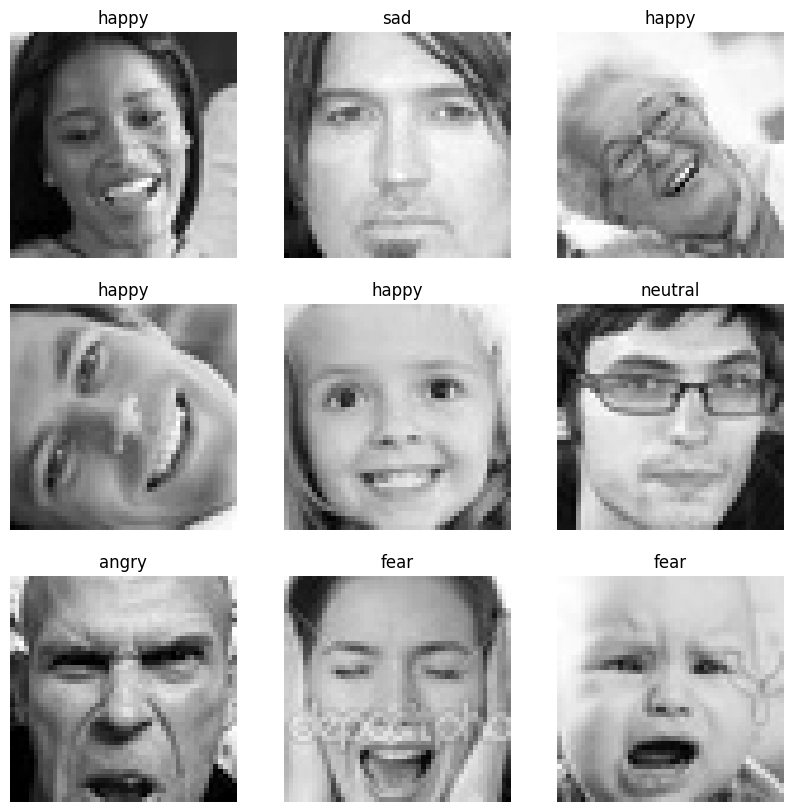

In [19]:
image_batch, label_batch = next(iter(fer_ds_train))  


# Convert tensors to NumPy arrays
image_batch_np = image_batch.numpy()
label_batch_np = label_batch.numpy()

# Randomly select 9 images from the batch
random_indices = rnd.sample(range(len(image_batch_np)), 9)  # Pick 9 random indices
random_images = [image_batch_np[i] for i in random_indices]
random_labels = [class_names[np.argmax(label_batch_np[i])] for i in random_indices]  

# Plot the images
plt.figure(figsize=(10, 10))

for i in range(9):  # Show 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i].squeeze(), cmap="gray")  # Display grayscale image
    plt.title(random_labels[i])  # Show class name
    plt.axis("off")  # Hide axis

plt.show()

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

fer_ds_train = fer_ds_train.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
fer_ds_val = fer_ds_val.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)
fer_ds_test = fer_ds_test.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)

Creating CNN Model

In [21]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(7, activation='softmax')  # 7 classes for FER dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\germd\Desktop\Emoji-Face-Detection\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Callback

In [22]:
earlystop = EarlyStopping(patience=5) 

Learning Rate Reduction

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [24]:
history = model.fit(fer_ds_train, validation_data=fer_ds_val, epochs=10, callbacks=callbacks)

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.2584 - loss: 1.8010 - val_accuracy: 0.4090 - val_loss: 1.5540 - learning_rate: 0.0010
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4003 - loss: 1.5489 - val_accuracy: 0.4545 - val_loss: 1.4166 - learning_rate: 0.0010
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4607 - loss: 1.4114 - val_accuracy: 0.5083 - val_loss: 1.3192 - learning_rate: 0.0010
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.5016 - loss: 1.3094 - val_accuracy: 0.5128 - val_loss: 1.2786 - learning_rate: 0.0010
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.5216 - loss: 1.2655 - val_accuracy: 0.5253 - val_loss: 1.2551 - learning_rate: 0.0010
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5429 - loss: 1.2052 - val_accuracy: 0.5337 - val_loss: 1.2264 - learning_rate: 0.0010
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5649 - l

In [25]:
test_loss, test_acc = model.evaluate(fer_ds_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.4521 - loss: 1.3844
Test Accuracy: 54.15%


Visualize Performance

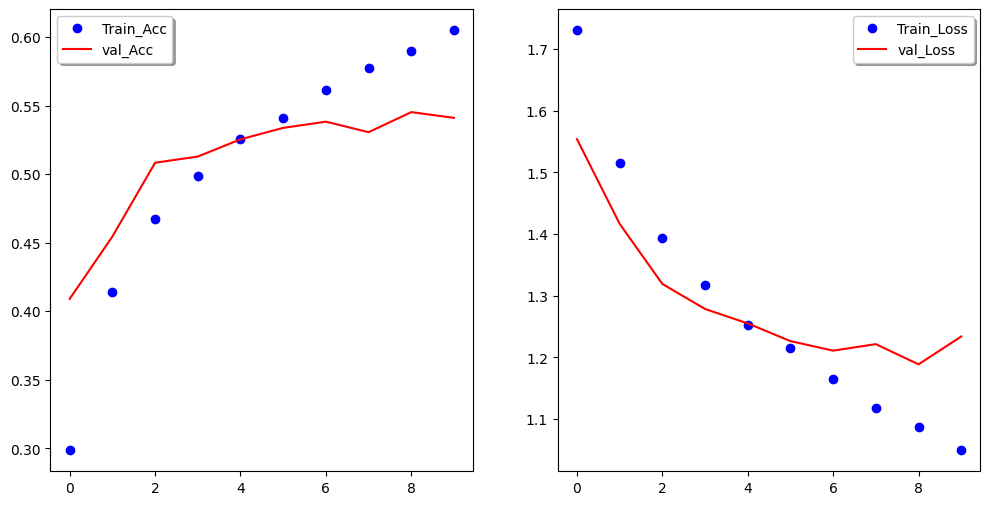

In [26]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'bo', label="Train_Acc")
plt.plot(epochs, val_accuracy, 'r', label="val_Acc")
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label="Train_Loss")
plt.plot(epochs, val_loss, 'r', label="val_Loss")
plt.legend(loc='best', shadow=True)

plt.show()

In [27]:
predictions = model.predict(fer_ds_test)
print(predictions)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
[[2.3552978e-01 1.5792175e-03 8.4933311e-02 ... 1.2252493e-01
  4.8600531e-01 9.1659446e-04]
 [5.1798630e-01 6.5462147e-03 1.4033784e-01 ... 4.2136282e-02
  2.0121330e-01 2.5149917e-02]
 [8.0548398e-02 1.4901089e-03 1.5423146e-01 ... 7.5348869e-02
  6.7900705e-01 7.1066915e-04]
 ...
 [6.2556744e-02 1.2692380e-03 1.3231055e-01 ... 1.0365130e-01
  3.9351273e-02 6.5099519e-01]
 [7.3804036e-02 1.4258864e-02 2.0059040e-01 ... 1.5234555e-01
  1.7147921e-01 3.8037711e-01]
 [1.8063914e-04 7.4777466e-07 2.0275880e-01 ... 3.8576889e-04
  1.7427957e-03 7.9243916e-01]]


In [28]:
# Convert probabilities to class indices
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = np.concatenate([y.numpy() for _, y in fer_ds_test])  
true_labels = np.argmax(true_labels, axis=1)

print(classification_report(true_labels, predicted_labels, zero_division=1))

# Print an example
print(f"Predicted Emotion: {class_names[predicted_labels[0]]}")
print(f"True Emotion: {class_names[true_labels[0]]}")

              precision    recall  f1-score   support

           0       0.51      0.41      0.45       958
           1       1.00      0.05      0.09       111
           2       0.38      0.24      0.29      1024
           3       0.81      0.74      0.78      1774
           4       0.52      0.46      0.49      1233
           5       0.36      0.65      0.46      1247
           6       0.74      0.66      0.69       831

    accuracy                           0.54      7178
   macro avg       0.62      0.46      0.46      7178
weighted avg       0.57      0.54      0.54      7178

Predicted Emotion: sad
True Emotion: angry


save model

In [32]:
model.save("./models/CNN.keras")
model.save_weights("./models/CNN.weights.h5")

In [39]:
from tensorflow import keras
import numpy as np
import cv2

# Charger le modèle
model = keras.models.load_model("./models/CNN.keras")

def preprocess_image(image_path, target_size=(48, 48)):  # Taille du modèle
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image {image_path} non trouvée")
    # Conversion en niveaux de gris + ajout de channel
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # <== Modifié
    image = cv2.resize(image, target_size)
    image = np.expand_dims(image, axis=-1)  # shape: (48, 48, 1)
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)    # shape: (1, 48, 48, 1)
    return image

# Prétraitement et prédiction
image = preprocess_image("images/photo.png")
prediction = model.predict(image)

classes =  ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Remplacez par vos classes réelles
predicted_class = classes[np.argmax(prediction)]
confidence = np.max(prediction)
print(f"Classe prédite: {predicted_class} (Confiance: {confidence:.2%})")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Classe prédite: sad (Confiance: 39.81%)
